In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [2]:
fire = pd.read_csv("D:\\Downloads\\Prajnya\\Assignments\\16.Neural Network\\forestfires.csv")
fire.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


### Data Visualisation

<AxesSubplot:xlabel='day', ylabel='count'>

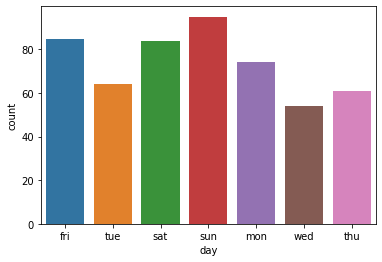

In [3]:
sns.countplot(x='day',data=fire)

<AxesSubplot:xlabel='month', ylabel='count'>

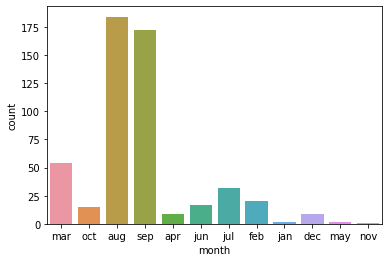

In [4]:
sns.countplot(x='month',data=fire)

(array([512.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.64, 1.28, 1.92, 2.56, 3.2 , 3.84, 4.48, 5.12, 5.76, 6.4 ]),
 <BarContainer object of 10 artists>)

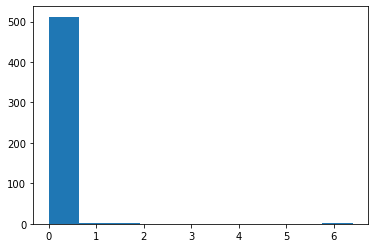

In [5]:
plt.hist(fire['rain'])

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

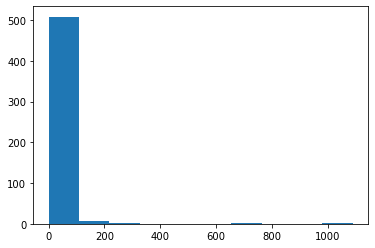

In [6]:
plt.hist(fire['area'])

<AxesSubplot:>

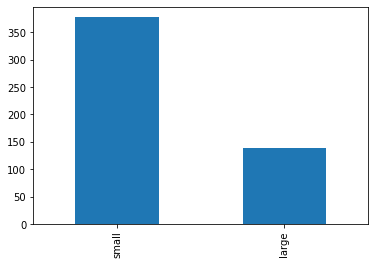

In [7]:
fire['size_category'].value_counts().plot.bar()

### Data Preprocessing

In [8]:
fire.drop(["month","day"],axis=1,inplace=True)
fire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
fire['size_category']=fire['size_category'].map({'large':1,'small':0})
fire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


### EDA

In [10]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [11]:
fire.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [12]:
fire.duplicated().sum()

8

In [13]:
fire = fire.drop_duplicates()

In [14]:
fire.shape

(509, 29)

In [15]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917,0.271120
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466,0.444975
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building

In [16]:
x = fire.iloc[:,0:28]
y = fire.iloc[:,28]

In [17]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 509, dtype: int64

In [19]:
#normalising the data
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)

In [20]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,...,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02
mean,-1.096700e-15,-7.852265e-18,-1.483206e-17,-8.986481e-17,1.832195e-16,1.797296e-16,2.225899e-16,-2.883526e-16,-4.765889e-17,-2.835540e-18,...,-4.740805e-16,1.013160e-16,-1.374146e-17,3.177986e-16,-3.446272e-17,3.167080e-16,-1.374146e-17,4.606662e-16,7.877349e-16,2.791916e-16
std,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,...,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00
min,-1.295805e+01,-1.712164e+00,-2.177385e+00,-1.969965e+00,-2.855946e+00,-1.789299e+00,-2.007272e+00,-6.903477e-02,-2.027913e-01,-4.414019e-01,...,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
25%,-7.532785e-02,-7.520348e-01,-4.439871e-01,-5.727610e-01,-5.938679e-01,-7.494866e-01,-7.288945e-01,-6.903477e-02,-2.027913e-01,-4.414019e-01,...,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
50%,1.769213e-01,-3.036890e-02,4.694951e-01,-1.361347e-01,7.447337e-02,-1.378325e-01,-6.333465e-03,-6.903477e-02,-1.932706e-01,-4.414019e-01,...,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
75%,4.111527e-01,4.873480e-01,6.699368e-01,4.314794e-01,6.742668e-01,5.349871e-01,4.939011e-01,-6.903477e-02,-1.000917e-01,-4.414019e-01,...,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,1.399751e+00
max,1.005740e+00,2.840606e+00,1.261583e+00,1.027740e+01,2.473647e+00,3.409762e+00,2.995074e+00,2.155478e+01,1.682288e+01,2.265509e+00,...,7.453560e+00,4.944694e+00,1.592168e+01,3.860861e+00,5.550901e+00,2.933219e+00,1.592168e+01,2.253886e+01,5.738757e+00,1.399751e+00


### Tuning of Hyperparameters : Batch Size and Epochs

In [24]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [25]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.990 total time=   2.9s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.863 total time=   1.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.873 total time=   1.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.892 total time=   1.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.871 total time=   1.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.863 total time=   2.5s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.912 total time=   3.0s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.891 total time=   2.3s


In [26]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9194331169128418, using {'batch_size': 20, 'epochs': 100}
0.897786819934845,0.047198022170638156 with: {'batch_size': 10, 'epochs': 10}
0.9095709443092346,0.05178042374792301 with: {'batch_size': 10, 'epochs': 50}
0.9115511417388916,0.04607742135734609 with: {'batch_size': 10, 'epochs': 100}
0.8487478017807006,0.06860324107724021 with: {'batch_size': 20, 'epochs': 10}
0.8978256583213806,0.0549964537473529 with: {'batch_size': 20, 'epochs': 50}
0.9194331169128418,0.0494002799083549 with: {'batch_size': 20, 'epochs': 100}
0.7248883724212647,0.1416601677826346 with: {'batch_size': 40, 'epochs': 10}
0.905571722984314,0.049458383116694975 with: {'batch_size': 40, 'epochs': 50}
0.8978256583213806,0.05904210319598785 with: {'batch_size': 40, 'epochs': 100}


### Tuning of Hyperparameters : Learning rate and Drop out rate

In [27]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   3.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.833 total time=   3.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.882 total time=   3.6s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.873 total time=   3.7s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.861 total time=   3.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [28]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9194525361061097, using {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8899242758750916,0.05743318499887852 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9174723267555237,0.04369367420685713 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9115705728530884,0.05409168800295223 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8978644967079162,0.05562494026932717 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9135119318962097,0.0445596002802374 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8154727220535278,0.15446141469124144 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8899048686027526,0.055450059834946545 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9194525361061097,0.04223051986169307 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7702776193618774,0.16410226083784035 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


### Tuning of Hyperparameters : Activation Function and Kernel Initializer

In [29]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   4.3s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.882 total time=   4.0s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.931 total time=   3.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.902 total time=   3.7s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.911 total time=   3.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.912 total time=   3.9s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.951 total time=   3.9s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.950 total time=   3.9s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   3.4s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.941 total time=   3.5s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.922 total time=   3.2s
[CV 4/5; 11/12] START activation_f

In [30]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9509027361869812, using {'activation_function': 'linear', 'init': 'normal'}
0.9253154754638672,0.04053084816530965 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.9331586003303528,0.03647227930830248 with: {'activation_function': 'softmax', 'init': 'normal'}
0.9174723386764526,0.02678220454885237 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8350805640220642,0.16898877494357242 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9155309677124024,0.047850770102474675 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.9370413422584534,0.03673829350139123 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9469423294067383,0.02950121433163115 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9489225268363952,0.029340497417767817 with: {'activatio

### Tuning of Hyperparameter : Number of Neurons in activation layer

In [31]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   3.6s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=   3.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.922 total time=   3.7s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.941 total time=   4.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.931 total time=   3.4s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [32]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9548243045806885, using {'neuron1': 16, 'neuron2': 2}
0.9508445024490356,0.027826928018845818 with: {'neuron1': 4, 'neuron2': 2}
0.9528440952301025,0.028013077394205676 with: {'neuron1': 4, 'neuron2': 4}
0.939060378074646,0.034268919143372746 with: {'neuron1': 4, 'neuron2': 8}
0.9548048853874207,0.02527874752448769 with: {'neuron1': 8, 'neuron2': 2}
0.9429819464683533,0.033146401392631156 with: {'neuron1': 8, 'neuron2': 4}
0.9488642930984497,0.02883371990762969 with: {'neuron1': 8, 'neuron2': 8}
0.9548243045806885,0.03135836916278398 with: {'neuron1': 16, 'neuron2': 2}
0.9371189951896668,0.034879656988040374 with: {'neuron1': 16, 'neuron2': 4}
0.9508833169937134,0.027028246436835993 with: {'neuron1': 16, 'neuron2': 8}


### Training model with optimum values of Hyperparameters

In [33]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(2,input_dim = 16,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

16/16 [==============================] - 0s 2ms/step
0.9921414538310412


In [34]:
y_predict

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

### Thus, accuracy is 99.21%